In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
file_path = "data/full_df.csv"  
data = pd.read_csv(file_path)

In [3]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3       mild no

In [4]:
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64


In [8]:
print("Column Names in the Dataset:")
print(data.columns)


Column Names in the Dataset:
Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')


In [9]:
print("\nUnique values in 'labels':")
print(data['labels'].unique())

print("\nUnique values in 'target':")
print(data['target'].unique())


Unique values in 'labels':
["['N']" "['D']" "['O']" "['M']" "['H']" "['C']" "['A']" "['G']"]

Unique values in 'target':
['[1, 0, 0, 0, 0, 0, 0, 0]' '[0, 1, 0, 0, 0, 0, 0, 0]'
 '[0, 0, 0, 0, 0, 0, 0, 1]' '[0, 0, 0, 0, 0, 0, 1, 0]'
 '[0, 0, 0, 0, 0, 1, 0, 0]' '[0, 0, 0, 1, 0, 0, 0, 0]'
 '[0, 0, 0, 0, 1, 0, 0, 0]' '[0, 0, 1, 0, 0, 0, 0, 0]']


In [10]:
print("\nClass Distribution:")
print(data['labels'].value_counts()) 


Class Distribution:
labels
['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: count, dtype: int64


In [7]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                ID  Patient Age            N            D            G  \
count  6392.000000  6392.000000  6392.000000  6392.000000  6392.000000   
mean   2271.150814    57.857947     0.328692     0.332134     0.062109   
std    1417.559018    11.727737     0.469775     0.471016     0.241372   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%     920.750000    51.000000     0.000000     0.000000     0.000000   
50%    2419.500000    59.000000     0.000000     0.000000     0.000000   
75%    3294.000000    66.000000     1.000000     1.000000     0.000000   
max    4784.000000    91.000000     1.000000     1.000000     1.000000   

                 C            A            H            M            O  
count  6392.000000  6392.000000  6392.000000  6392.000000  6392.000000  
mean      0.062891     0.049906     0.031758     0.047872     0.248436  
std       0.242786     0.217768     0.175370     0.213513     0.432139  
min       0.000000  

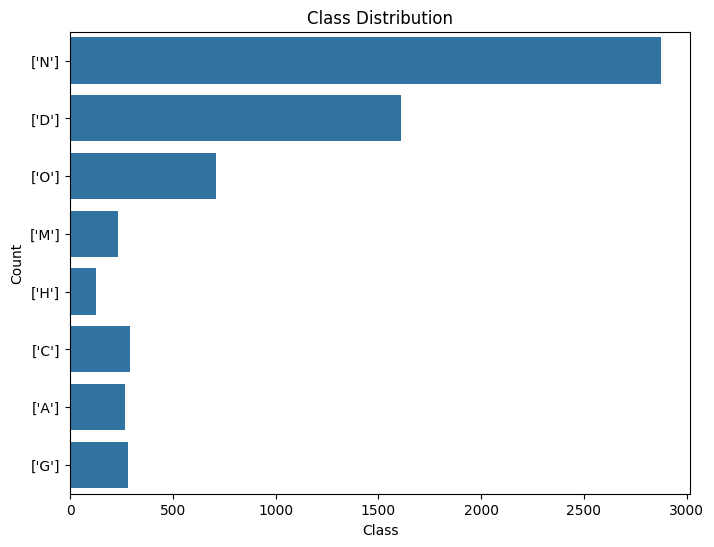

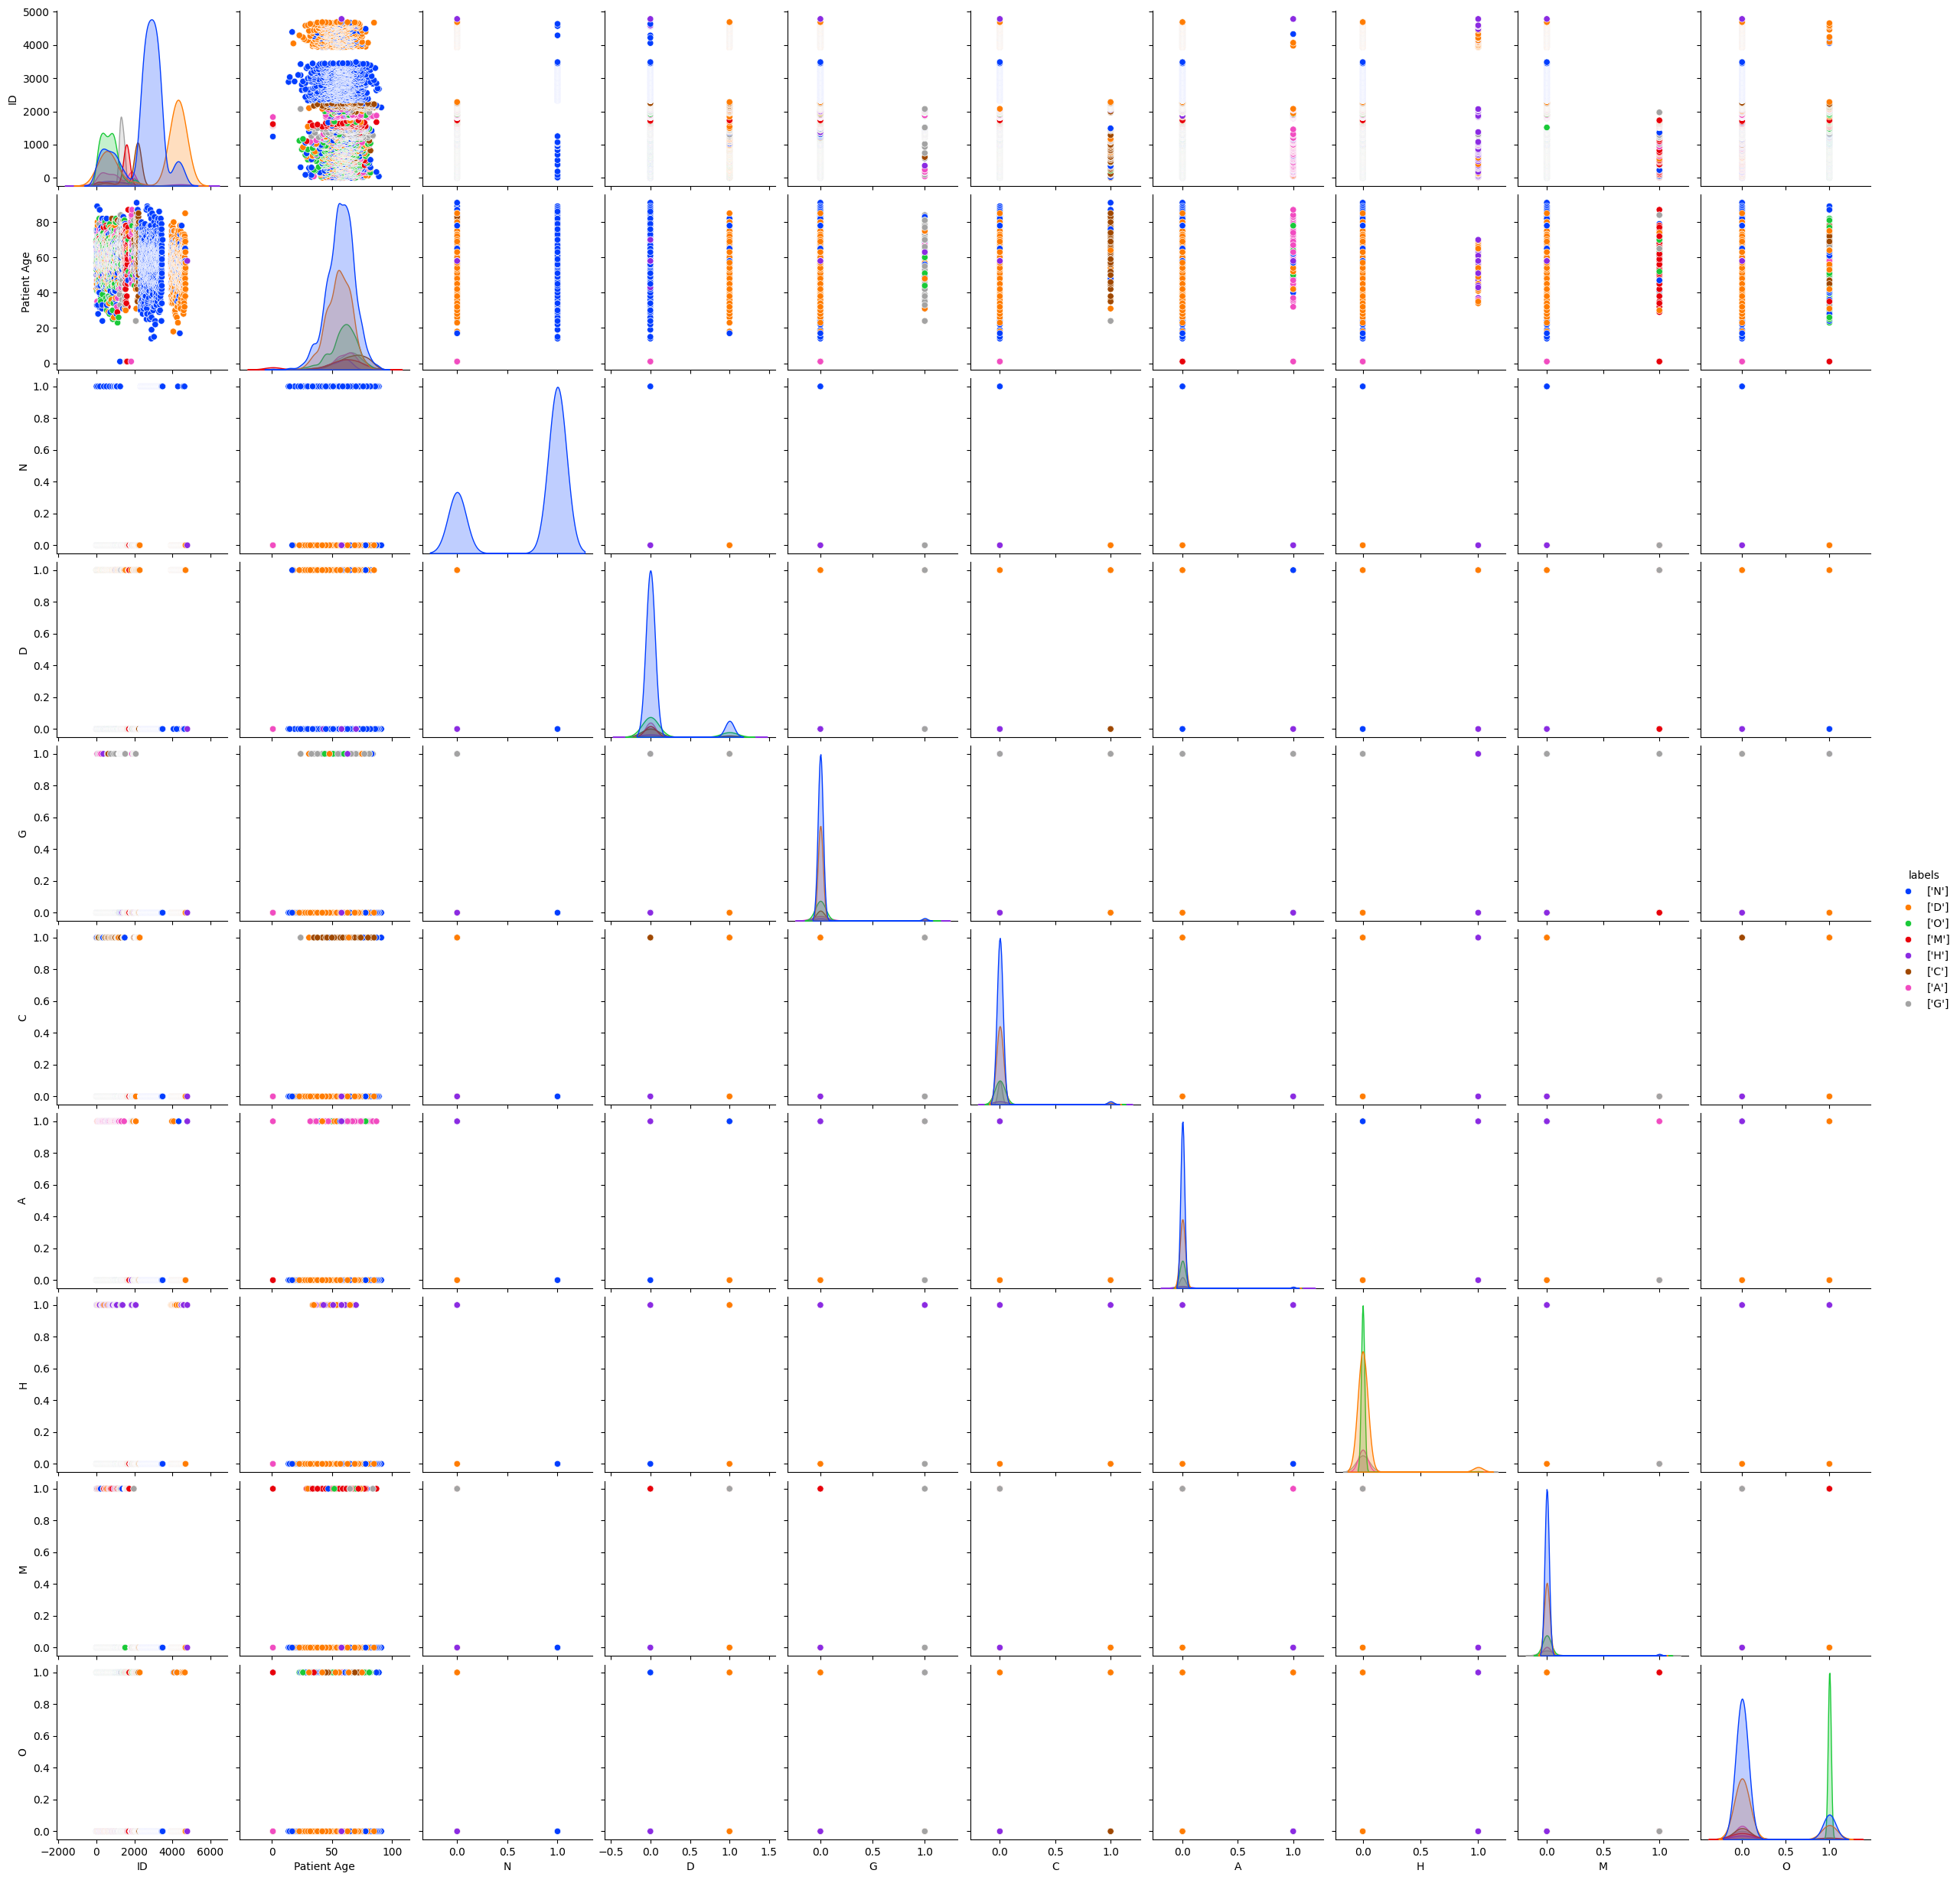

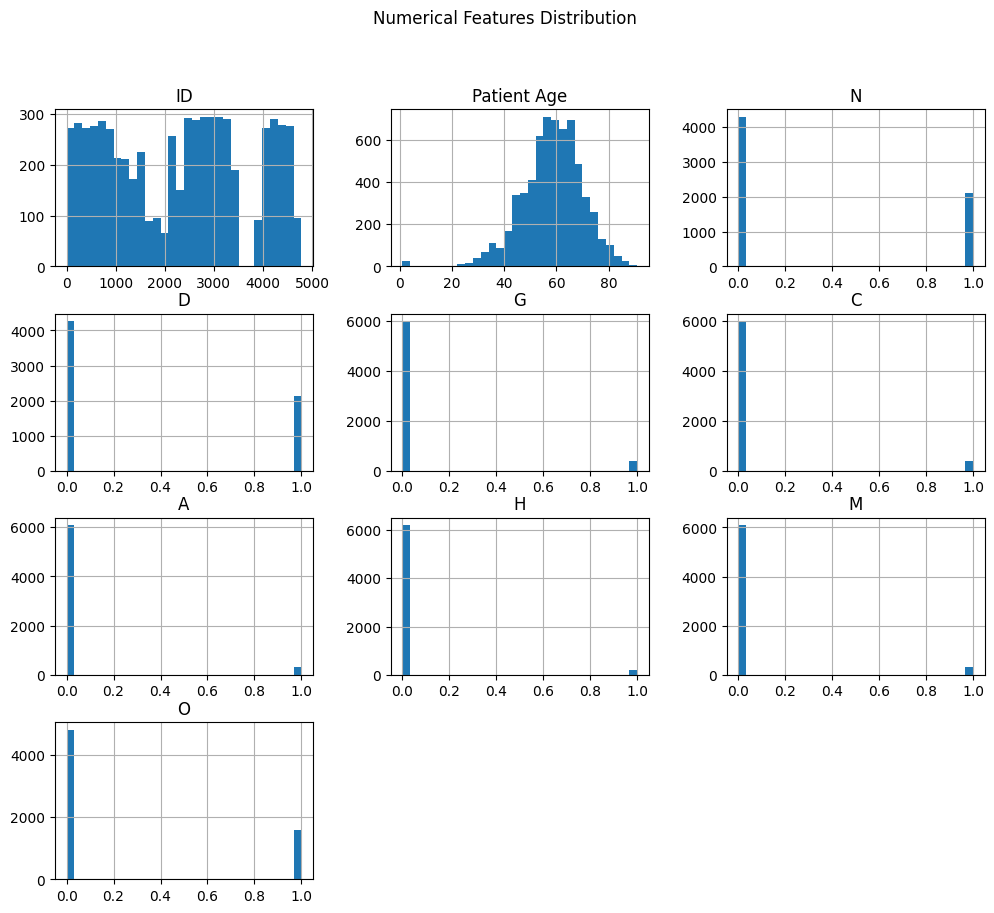

In [13]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['labels'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Correlation matrix (if applicable)
if 'features' in data.columns:
    plt.figure(figsize=(12, 10))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Feature Correlation Matrix")
    plt.show()

# Pairplot for feature relationships
sns.pairplot(data, hue='labels', diag_kind='kde', palette='bright')
plt.show()

# Check data distribution for numerical features
num_features = data.select_dtypes(include=['float64', 'int64']).columns
data[num_features].hist(figsize=(12, 10), bins=30)
plt.suptitle("Numerical Features Distribution")
plt.show()


In [15]:

data['labels'] = data['labels'].str.strip("[]").str.replace("'", "").str.strip()

label_mapping = {label: idx for idx, label in enumerate(data['labels'].unique())}
data['label_encoded'] = data['labels'].map(label_mapping)

print("Label Mapping:")
print(label_mapping)

print("\nEncoded Labels:")
print(data[['labels', 'label_encoded']])


Label Mapping:
{'N': 0, 'D': 1, 'O': 2, 'M': 3, 'H': 4, 'C': 5, 'A': 6, 'G': 7}

Encoded Labels:
     labels  label_encoded
0         N              0
1         N              0
2         D              1
3         D              1
4         D              1
...     ...            ...
6387      D              1
6388      D              1
6389      D              1
6390      D              1
6391      H              4

[6392 rows x 2 columns]


In [18]:
# Drop irrelevant columns (e.g., 'ID', 'filepath', 'filename') explicitly
irrelevant_columns = ['ID', 'filepath', 'filename', 'labels', 'label_encoded', 'target']
X = data.drop(columns=irrelevant_columns, errors='ignore')

# Identify non-numeric columns in the remaining dataset
non_numeric_columns = X.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns to encode:", non_numeric_columns)

# One-hot encode non-numeric columns
X_encoded = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

# Standardize the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
from sklearn.model_selection import train_test_split
y = data['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Verify shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


Non-numeric columns to encode: ['Patient Sex', 'Left-Fundus', 'Right-Fundus', 'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords']
X_train shape: (5113, 7123), X_test shape: (1279, 7123)
y_train shape: (5113,), y_test shape: (1279,)


## <span style="color: cyan">Random Forest Classifier</span>

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Metrics:
Accuracy: 0.72869429241595

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       575
           1       0.75      0.76      0.75       322
           2       0.40      0.35      0.37       142
           3       0.81      0.93      0.87        46
           4       0.81      0.88      0.85        25
           5       0.63      0.73      0.68        59
           6       0.85      0.89      0.87        53
           7       0.73      0.72      0.73        57

    accuracy                           0.73      1279
   macro avg       0.72      0.75      0.74      1279
weighted avg       0.72      0.73      0.73      1279


Confusion Matrix:
 [[443  50  51   6   0  11   5   9]
 [ 45 244  16   2   3   8   1   3]
 [ 62  17  49   2   1   6   2   3]
 [  0   2   1  43   0   0   0   0]
 [  0   3   0   0  22   0   0   0]
 [  9   5   2   0   0  43   0   0]
 [  3   2   0   0   1   0  47   0]
 [  9   

## <span style="color: crimson">KNN</span>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("\nKNN Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



KNN Metrics:
Accuracy: 0.7607505863956215

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       575
           1       0.90      0.68      0.77       322
           2       0.63      0.22      0.32       142
           3       0.92      0.74      0.82        46
           4       0.84      0.84      0.84        25
           5       0.69      0.69      0.69        59
           6       0.91      0.79      0.85        53
           7       0.95      0.61      0.74        57

    accuracy                           0.76      1279
   macro avg       0.82      0.69      0.73      1279
weighted avg       0.77      0.76      0.74      1279


Confusion Matrix:
 [[551   7   3   0   0  11   1   2]
 [ 83 218  11   2   3   3   2   0]
 [ 98   7  31   1   0   4   1   0]
 [ 10   1   1  34   0   0   0   0]
 [  2   2   0   0  21   0   0   0]
 [ 10   6   2   0   0  41   0   0]
 [  9   1   0   0   1   0  42   0]
 [ 21   0   1   

## <span style="color: crimson"></span>

## <span style="color: darkturquoise">Logistic Regression Model</span>  

In [21]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



Logistic Regression Metrics:
Accuracy: 0.7318217357310399

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       575
           1       0.76      0.77      0.76       322
           2       0.40      0.34      0.37       142
           3       0.81      0.93      0.87        46
           4       0.84      0.84      0.84        25
           5       0.63      0.73      0.68        59
           6       0.84      0.91      0.87        53
           7       0.75      0.77      0.76        57

    accuracy                           0.73      1279
   macro avg       0.73      0.76      0.74      1279
weighted avg       0.73      0.73      0.73      1279


Confusion Matrix:
 [[442  52  49   6   0  11   6   9]
 [ 42 247  16   2   3   8   1   3]
 [ 65  16  48   2   0   6   2   3]
 [  0   2   1  43   0   0   0   0]
 [  0   3   1   0  21   0   0   0]
 [  9   5   2   0   0  43   0   0]
 [  3   1   0   0   1   0  48   0]


## <span style="color: fuchsia">Gradient Boosting Model</span>

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))



Gradient Boosting Metrics:
Accuracy: 0.7302580140734949

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       575
           1       0.76      0.75      0.75       322
           2       0.40      0.34      0.37       142
           3       0.82      0.91      0.87        46
           4       0.81      0.88      0.85        25
           5       0.64      0.71      0.67        59
           6       0.85      0.89      0.87        53
           7       0.75      0.72      0.73        57

    accuracy                           0.73      1279
   macro avg       0.73      0.75      0.74      1279
weighted avg       0.72      0.73      0.73      1279


Confusion Matrix:
 [[451  45  50   6   0  10   5   8]
 [ 49 241  16   1   3   8   1   3]
 [ 63  17  48   2   1   6   2   3]
 [  0   3   1  42   0   0   0   0]
 [  0   3   0   0  22   0   0   0]
 [ 10   5   2   0   0  42   0   0]
 [  4   1   0   0   1   0  47   0]
 [

## <span style="color: Palegreen">Support Vector Machine</span> 

In [24]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



SVM Metrics:
Accuracy: 0.6606724003127443

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72       575
           1       0.77      0.69      0.73       322
           2       0.30      0.21      0.25       142
           3       0.79      0.50      0.61        46
           4       0.81      0.68      0.74        25
           5       0.57      0.46      0.51        59
           6       0.84      0.70      0.76        53
           7       0.71      0.51      0.59        57

    accuracy                           0.66      1279
   macro avg       0.68      0.57      0.61      1279
weighted avg       0.66      0.66      0.65      1279


Confusion Matrix:
 [[461  42  47   3   0  10   5   7]
 [ 72 221  16   1   3   6   1   2]
 [ 90  12  30   2   0   4   1   3]
 [ 20   2   1  23   0   0   0   0]
 [  5   3   0   0  17   0   0   0]
 [ 25   5   2   0   0  27   0   0]
 [ 14   1   0   0   1   0  37   0]
 [ 24   1   3   

 ## <span style="color: springgreen">XGBoost Classifier</span>

In [26]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(tree_method = "hist", device = "cuda", random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



XGBoost Metrics:
Accuracy: 0.7498045347928068

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       575
           1       0.80      0.75      0.77       322
           2       0.44      0.39      0.42       142
           3       0.81      0.93      0.87        46
           4       0.81      0.88      0.85        25
           5       0.64      0.71      0.67        59
           6       0.87      0.87      0.87        53
           7       0.77      0.70      0.73        57

    accuracy                           0.75      1279
   macro avg       0.74      0.76      0.75      1279
weighted avg       0.75      0.75      0.75      1279


Confusion Matrix:
 [[470  29  48   6   0  11   5   6]
 [ 51 240  15   2   3   7   1   3]
 [ 58  15  56   2   1   6   1   3]
 [  0   2   1  43   0   0   0   0]
 [  0   3   0   0  22   0   0   0]
 [  9   6   2   0   0  42   0   0]
 [  4   1   1   0   1   0  46   0]
 [ 11   3   

## <span style="color: seagreen">AdaBoost Classifier</span>

In [37]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

print("\nAdaBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))


/home/spandan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Metrics:
Accuracy: 0.5895230648944488

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84       575
           1       0.38      0.98      0.55       322
           2       0.00      0.00      0.00       142
           3       0.00      0.00      0.00        46
           4       0.71      1.00      0.83        25
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        57

    accuracy                           0.59      1279
   macro avg       0.26      0.34      0.28      1279
weighted avg       0.56      0.59      0.53      1279


Confusion Matrix:
 [[414 161   0   0   0   0   0   0]
 [  0 315   0   0   7   0   0   0]
 [  0 141   0   0   1   0   0   0]
 [  0  46   0   0   0   0   0   0]
 [  0   0   0   0  25   0   0   0]
 [  0  59   0   0   0   0   0   0]
 [  0  52   0   0   1   0   0   0]
 [  0  56  

/home/spandan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/spandan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/spandan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
import numpy as np
from collections import Counter

print("Class distribution in training set:", Counter(y_train))


Class distribution in training set: Counter({0: 2298, 1: 1286, 2: 566, 5: 234, 7: 227, 6: 213, 3: 186, 4: 103})


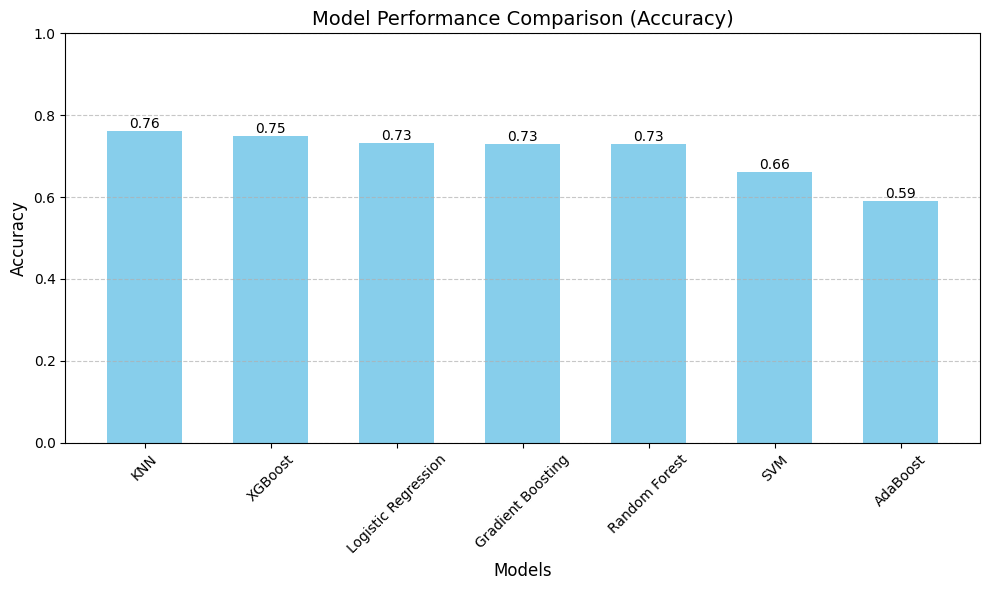

In [39]:
import matplotlib.pyplot as plt


model_accuracies = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
}


sorted_accuracies = dict(sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))

bars = plt.bar(sorted_accuracies.keys(), sorted_accuracies.values(), color='skyblue', width=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha='center', va='bottom')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Model Performance Comparison (Accuracy)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 1)
plt.tight_layout()

plt.show()
